In [1]:
import pandas as pd
import numpy as np

In [2]:
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter('ignore')

## Import Dataset

In [4]:
train_df = pd.read_csv('train.csv')

## Data Assessment

In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
num_var = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
          'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
          'PoolArea','MiscVal','SalePrice']
cat_var = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','BsmtQual','BsmtCond',
           'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
          'Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageYrBlt','GarageFinish',
          'GarageCars','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MoSold','YrSold']
nom_var = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
           'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
          'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','MiscFeature',
          'SaleType','SaleCondition']

In [12]:
train_df.shape

(1460, 81)

In [13]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Missing Values

In [6]:
train_df.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [7]:
train_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True)
train_df.fillna({'GarageCond':'NA','GarageType':'NA','GarageFinish':'NA','GarageQual':'NA',
                'GarageYrBlt':1900,'BsmtExposure':'NA','BsmtFinType2':'NA','BsmtFinType1':'NA',
                'BsmtCond':'NA','BsmtQual':'NA','MasVnrArea':0,'MasVnrType':'None','Electrical':'SBrkr'},inplace=True)

In [8]:
num_var = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
          'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
          'PoolArea','MiscVal','SalePrice']

cat_var = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterQual','ExterCond','BsmtQual','BsmtCond',
           'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
          'Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageFinish',
          'GarageCars','GarageQual','GarageCond','PavedDrive','MoSold','YrSold']

nom_var = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
           'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
          'Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType',
          'SaleType','SaleCondition']

## Univariate Analysis

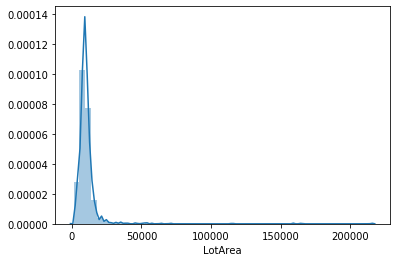

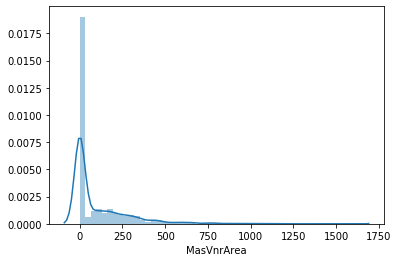

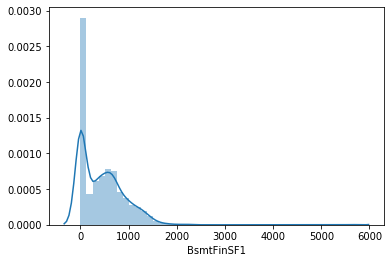

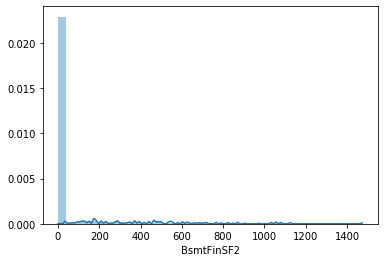

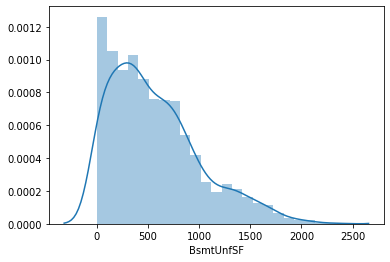

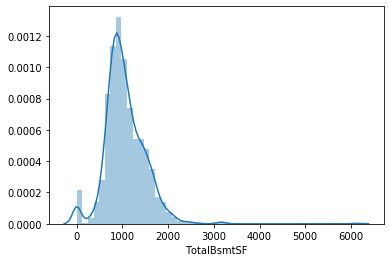

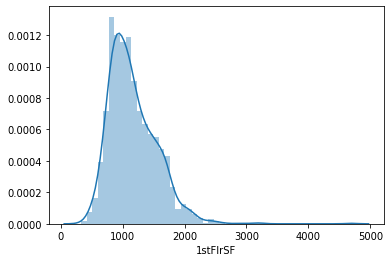

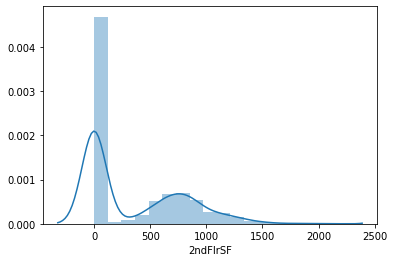

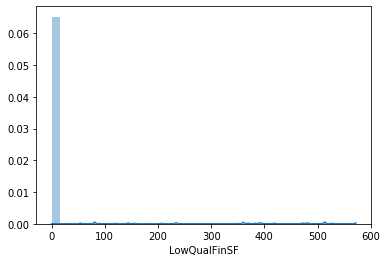

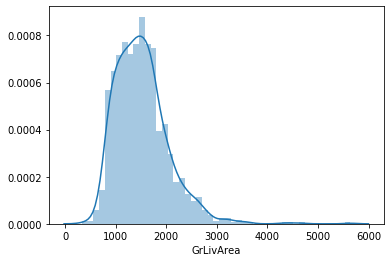

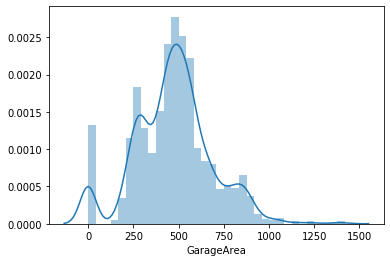

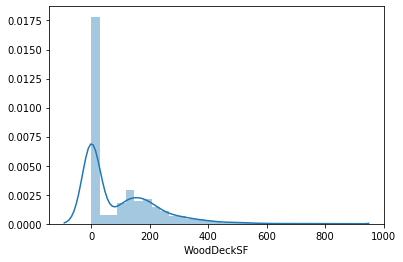

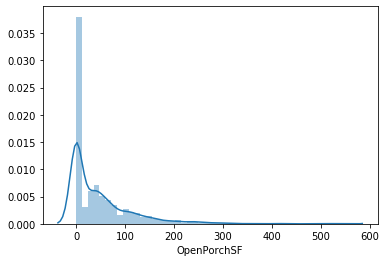

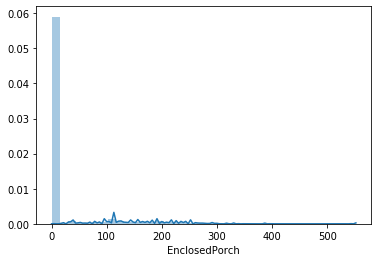

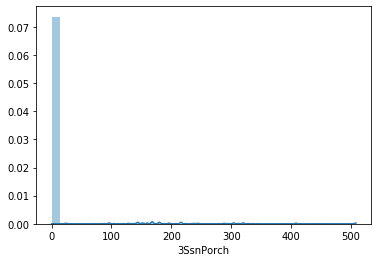

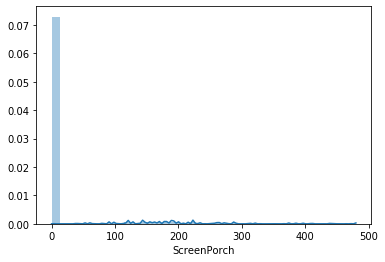

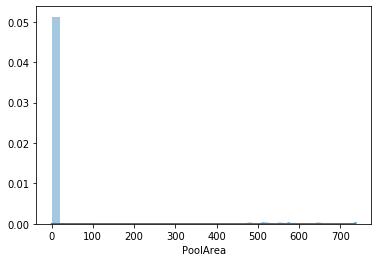

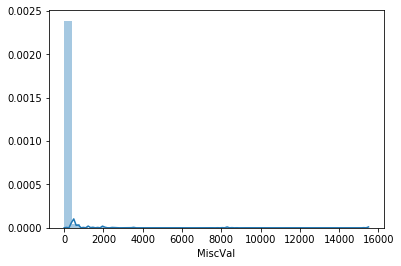

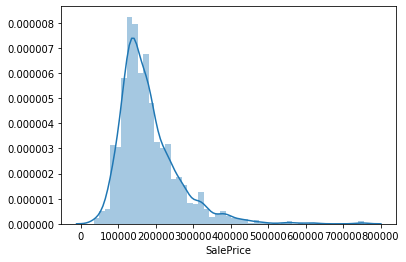

In [9]:
for n in num_var:
    plt.figure(num_var.index(n)+1)
    sns.distplot(train_df[n].dropna())

In [34]:
print('Skewness : ',train_df['SalePrice'].skew())
print('Kurtosis : ',train_df['SalePrice'].kurt())

Skewness :  1.8828757597682129
Kurtosis :  6.536281860064529


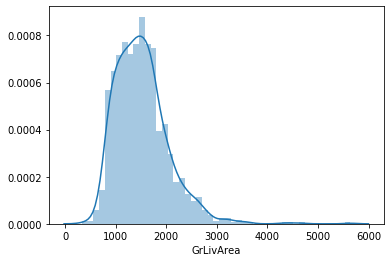

In [35]:
sns.distplot(train_df['GrLivArea'])

In [36]:
print('Skewness : ',train_df['GrLivArea'].skew())
print('Kurtosis : ',train_df['GrLivArea'].kurt())

Skewness :  1.3665603560164552
Kurtosis :  4.895120580693174


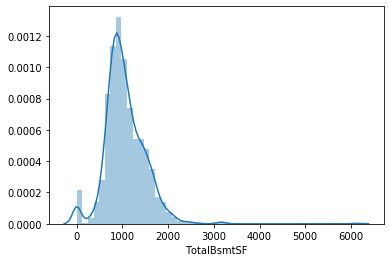

In [37]:
sns.distplot(train_df['TotalBsmtSF'])

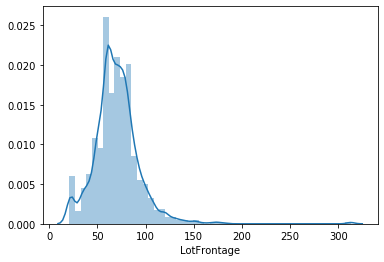

In [38]:
sns.distplot(train_df['LotFrontage'].dropna())

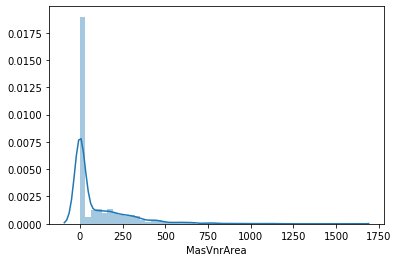

In [39]:
sns.distplot(train_df['MasVnrArea'].dropna())

## Bivariate Analysis

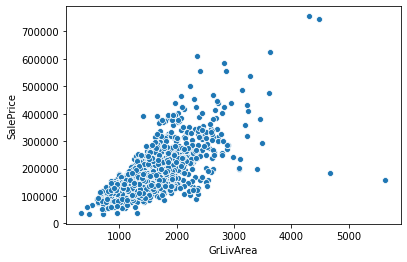

In [40]:
sns.scatterplot(x=train_df['GrLivArea'],y=train_df['SalePrice'])

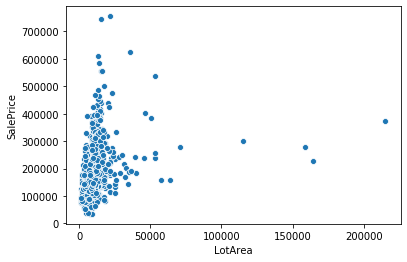

In [41]:
sns.scatterplot(x=train_df['LotArea'],y=train_df['SalePrice'])

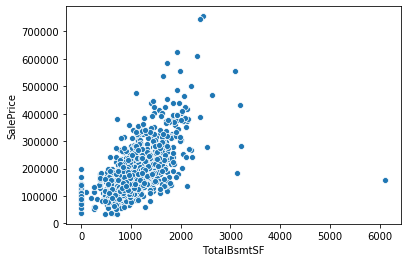

In [42]:
sns.scatterplot(x=train_df['TotalBsmtSF'],y=train_df['SalePrice'])

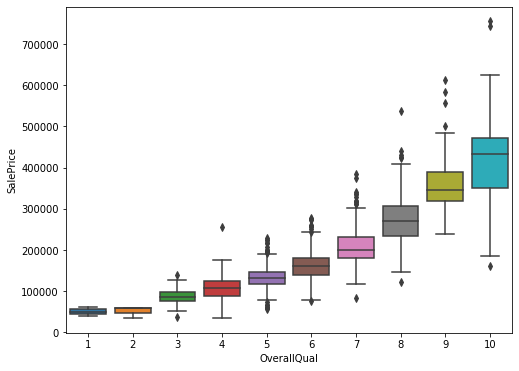

In [43]:
f , ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=train_df,x='OverallQual',y='SalePrice')

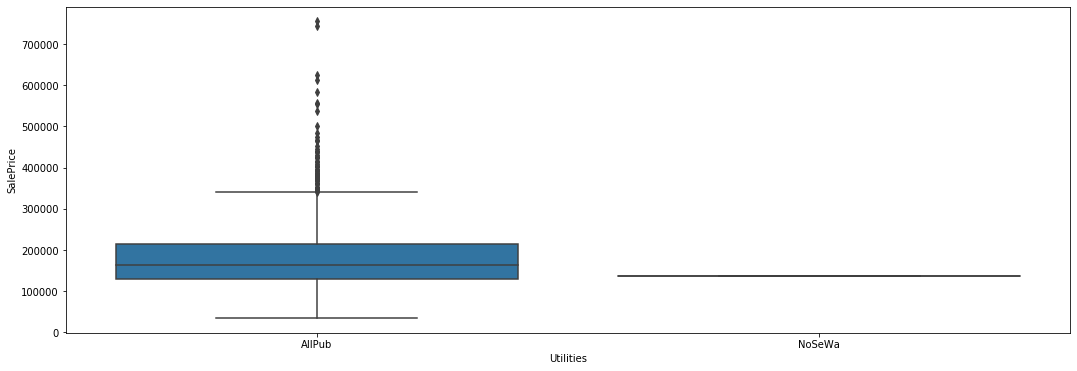

In [61]:
f , ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=train_df,x='Utilities',y='SalePrice')

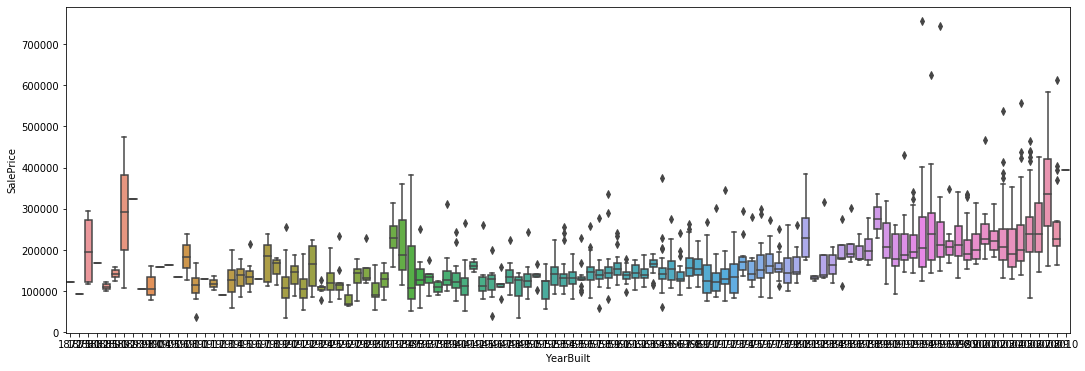

In [44]:
f , ax = plt.subplots(figsize=(18,6))
sns.boxplot(data=train_df,x='YearBuilt',y='SalePrice')

## Correlation

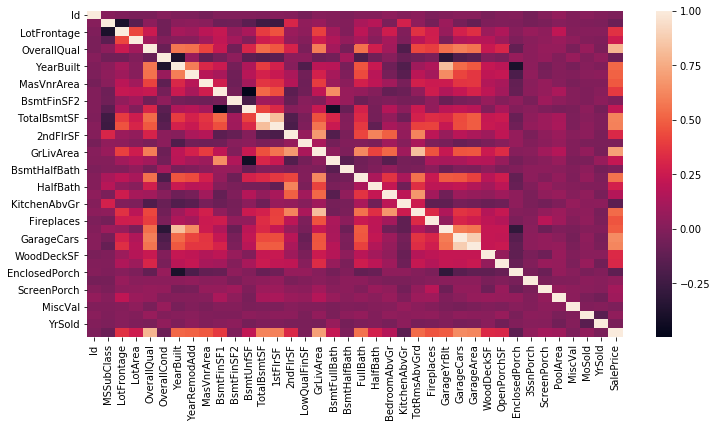

In [61]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corrmat)